## EXP_2467_seq_prune_08_4_64_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
round0 [2 6 4 7]
2
Epoch 1/5
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 - 5s - loss: 0.0829 - accuracy: 0.9697 - val_loss: 0.0510 - val_accuracy: 0.9836
Epoch 2/5
1250/1250 - 4s - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.0473 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0631 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 3s - loss: 1.3101e-04 - accuracy: 1.0000 - val_loss: 0.0680 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 4s - loss: 3.7960e-05 - accuracy: 1.0000 - val_loss: 0.0781 - val_accuracy: 0.9867


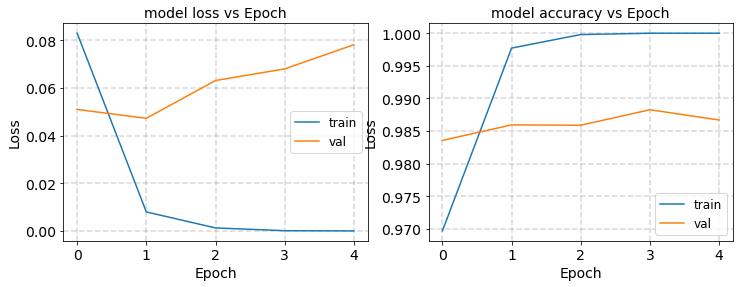

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0954 - accuracy: 0.9792 - val_loss: 0.0390 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0359 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 9.0695e-04 - accuracy: 0.9999 - val_loss: 0.0478 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 1.3987e-04 - accuracy: 1.0000 - val_loss: 0.0531 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 4.8568e-05 - accuracy: 1.0000 - val_loss: 0.0575 - val_accuracy: 0.9898


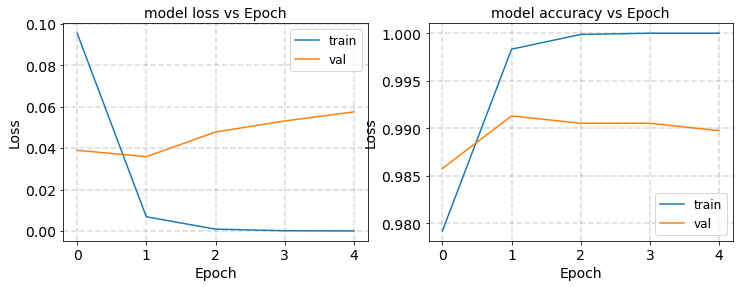

4
Epoch 1/5
1250/1250 - 5s - loss: 0.0954 - accuracy: 0.9811 - val_loss: 0.0353 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0087 - accuracy: 0.9979 - val_loss: 0.0403 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 5s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0484 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 4s - loss: 2.8259e-04 - accuracy: 1.0000 - val_loss: 0.0501 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 4s - loss: 8.1752e-05 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 0.9898


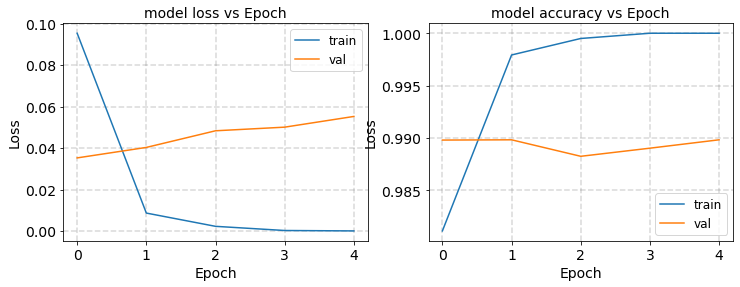

7
Epoch 1/5
1250/1250 - 5s - loss: 0.0949 - accuracy: 0.9835 - val_loss: 0.0525 - val_accuracy: 0.9844
Epoch 2/5
1250/1250 - 4s - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0461 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0617 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 4s - loss: 8.2995e-04 - accuracy: 0.9999 - val_loss: 0.0635 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 4s - loss: 1.6041e-04 - accuracy: 1.0000 - val_loss: 0.0704 - val_accuracy: 0.9890


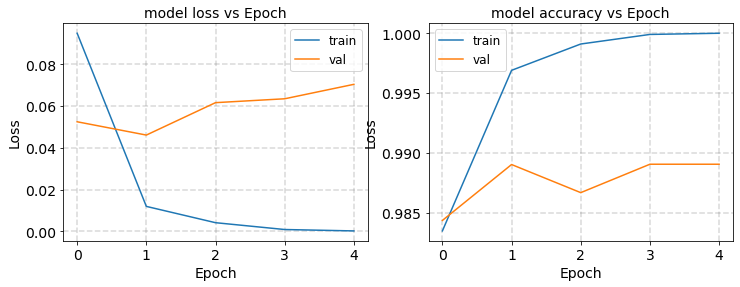

round1 [2 6 4 7]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.1253 - accuracy: 0.9800 - val_loss: 0.0572 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 4s - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.0659 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 4s - loss: 6.1336e-04 - accuracy: 0.9999 - val_loss: 0.0798 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 4s - loss: 1.1312e-04 - accuracy: 1.0000 - val_loss: 0.0865 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 4s - loss: 3.7851e-05 - accuracy: 1.0000 - val_loss: 0.0960 - val_accuracy: 0.9883


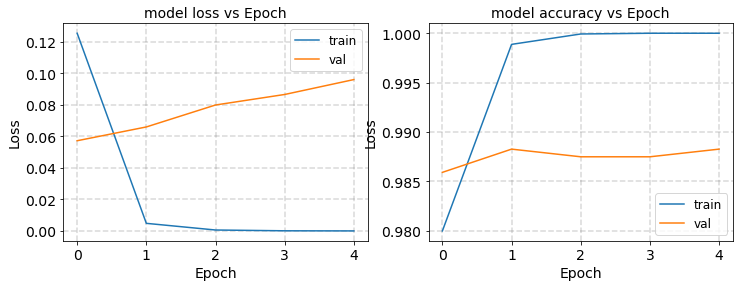

6
Epoch 1/5
1250/1250 - 4s - loss: 0.1110 - accuracy: 0.9761 - val_loss: 0.0260 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0332 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 4.1028e-04 - accuracy: 1.0000 - val_loss: 0.0364 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 5s - loss: 1.0763e-04 - accuracy: 1.0000 - val_loss: 0.0397 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 5s - loss: 4.3309e-05 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 0.9913


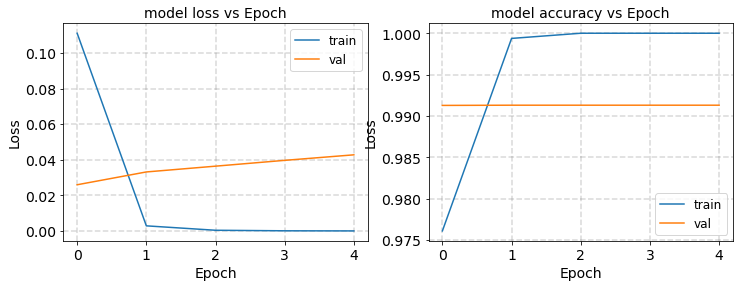

4
Epoch 1/5
1250/1250 - 4s - loss: 0.1255 - accuracy: 0.9777 - val_loss: 0.0384 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 4s - loss: 0.0140 - accuracy: 0.9966 - val_loss: 0.0432 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0444 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0469 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 1.9860e-04 - accuracy: 1.0000 - val_loss: 0.0528 - val_accuracy: 0.9922


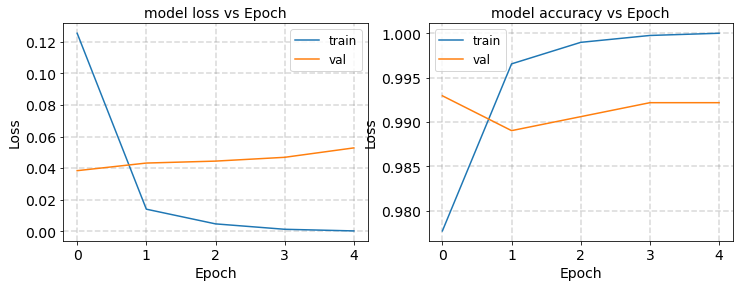

7
Epoch 1/5
1250/1250 - 4s - loss: 0.1267 - accuracy: 0.9779 - val_loss: 0.0354 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.0243 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0292 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 5.4650e-04 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 4s - loss: 1.6325e-04 - accuracy: 1.0000 - val_loss: 0.0399 - val_accuracy: 0.9922


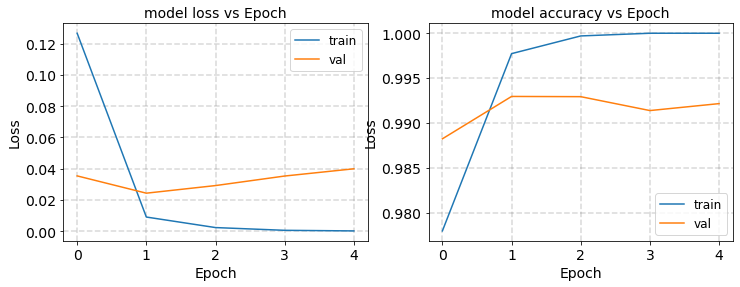

round2 [7 4 2 6]
7
Epoch 1/5
1250/1250 - 5s - loss: 6.0271e-05 - accuracy: 1.0000 - val_loss: 0.0449 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 4s - loss: 2.4112e-05 - accuracy: 1.0000 - val_loss: 0.0482 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 1.0345e-05 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 4s - loss: 4.7456e-06 - accuracy: 1.0000 - val_loss: 0.0544 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 2.1384e-06 - accuracy: 1.0000 - val_loss: 0.0574 - val_accuracy: 0.9922


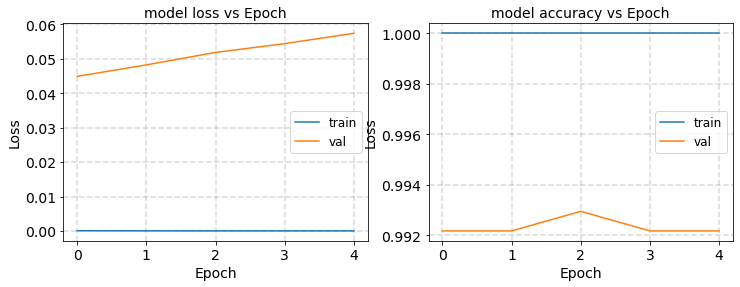

4
Epoch 1/5
1250/1250 - 3s - loss: 0.1971 - accuracy: 0.9523 - val_loss: 0.0609 - val_accuracy: 0.9844
Epoch 2/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0649 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0779 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 3.1317e-04 - accuracy: 0.9999 - val_loss: 0.0856 - val_accuracy: 0.9891
Epoch 5/5
1250/1250 - 3s - loss: 5.8239e-05 - accuracy: 1.0000 - val_loss: 0.0970 - val_accuracy: 0.9898


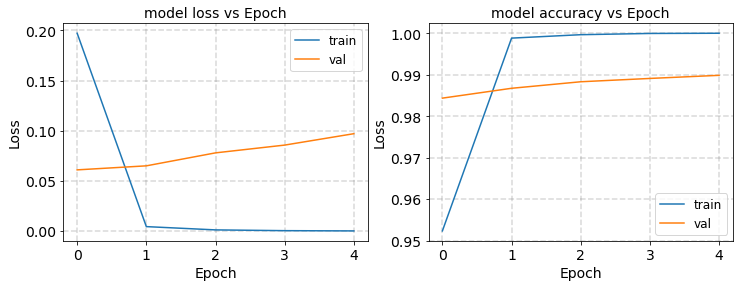

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1500 - accuracy: 0.9746 - val_loss: 0.0641 - val_accuracy: 0.9828
Epoch 2/5
1250/1250 - 3s - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.0670 - val_accuracy: 0.9820
Epoch 3/5
1250/1250 - 2s - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0687 - val_accuracy: 0.9844
Epoch 4/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0778 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0835 - val_accuracy: 0.9827


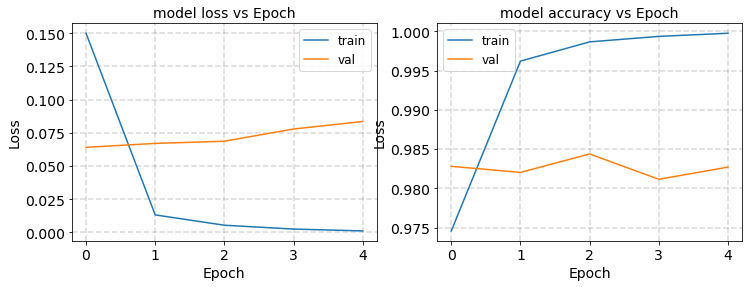

6
Epoch 1/5
1250/1250 - 3s - loss: 0.1224 - accuracy: 0.9754 - val_loss: 0.0256 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0245 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0247 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 9.5459e-04 - accuracy: 0.9998 - val_loss: 0.0277 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 3.3050e-04 - accuracy: 0.9999 - val_loss: 0.0321 - val_accuracy: 0.9936


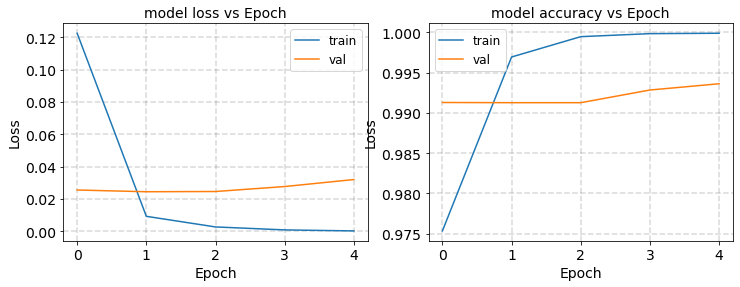

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten  (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_1  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_2  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_3  (None, 64)                8258      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

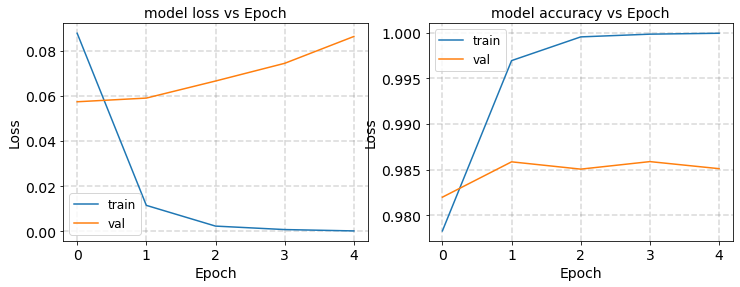

4
Epoch 1/5
1250/1250 - 4s - loss: 0.1200 - accuracy: 0.9698 - val_loss: 0.0403 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0131 - accuracy: 0.9973 - val_loss: 0.0549 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 4s - loss: 0.0038 - accuracy: 0.9995 - val_loss: 0.0490 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0577 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0645 - val_accuracy: 0.9914


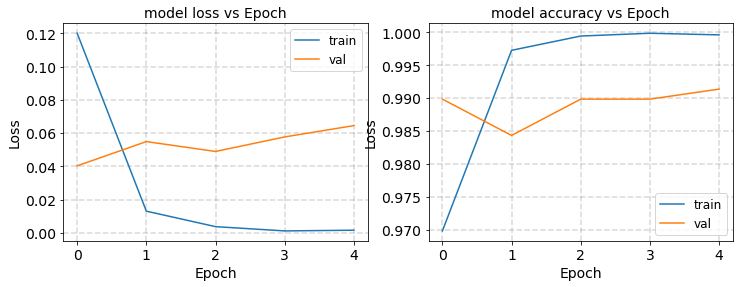

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0942 - accuracy: 0.9816 - val_loss: 0.0448 - val_accuracy: 0.9836
Epoch 2/5
1250/1250 - 4s - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.0510 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 4s - loss: 8.8119e-04 - accuracy: 0.9999 - val_loss: 0.0550 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 4s - loss: 1.3687e-04 - accuracy: 1.0000 - val_loss: 0.0600 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 4.8925e-05 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 0.9882


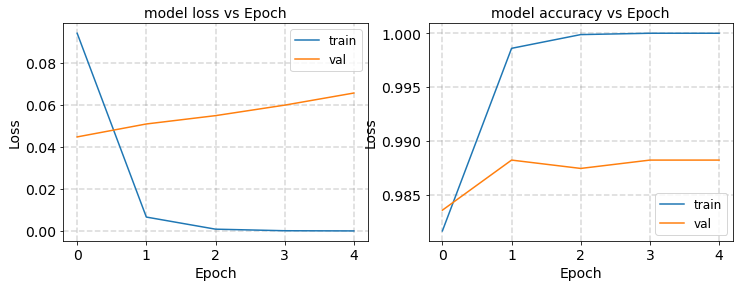

6
Epoch 1/5
1250/1250 - 4s - loss: 0.1128 - accuracy: 0.9842 - val_loss: 0.0342 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 5s - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0354 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 5s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0370 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 5s - loss: 2.1921e-04 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 5s - loss: 5.7863e-05 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9929


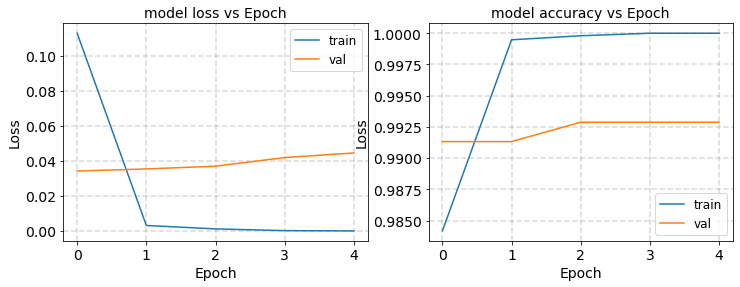

round1 [7 6 4 2]
7
Epoch 1/5
1250/1250 - 4s - loss: 0.0671 - accuracy: 0.9905 - val_loss: 0.0309 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 4s - loss: 8.0347e-04 - accuracy: 1.0000 - val_loss: 0.0394 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 1.1805e-04 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 4s - loss: 4.7136e-05 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 1.6228e-05 - accuracy: 1.0000 - val_loss: 0.0537 - val_accuracy: 0.9922


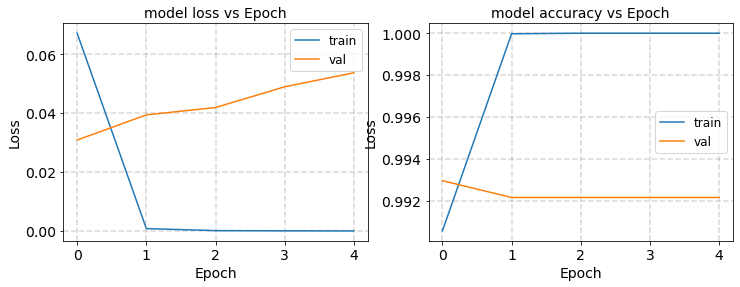

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0578 - accuracy: 0.9937 - val_loss: 0.0390 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 4s - loss: 2.1278e-04 - accuracy: 1.0000 - val_loss: 0.0410 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 4s - loss: 7.2498e-05 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 2.8777e-05 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 1.2108e-05 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 0.9905


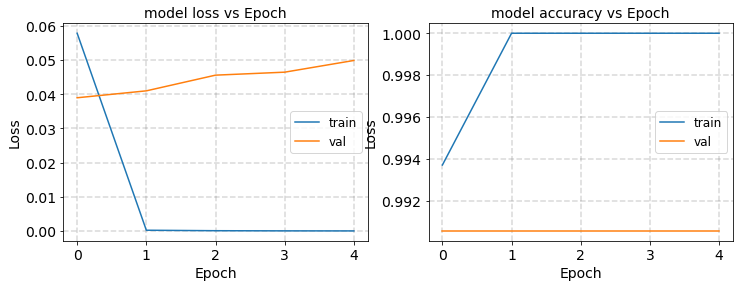

4
Epoch 1/5
1250/1250 - 4s - loss: 0.1036 - accuracy: 0.9802 - val_loss: 0.0321 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.0327 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0403 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 4s - loss: 2.4605e-04 - accuracy: 1.0000 - val_loss: 0.0471 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 3.1178e-05 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 0.9914


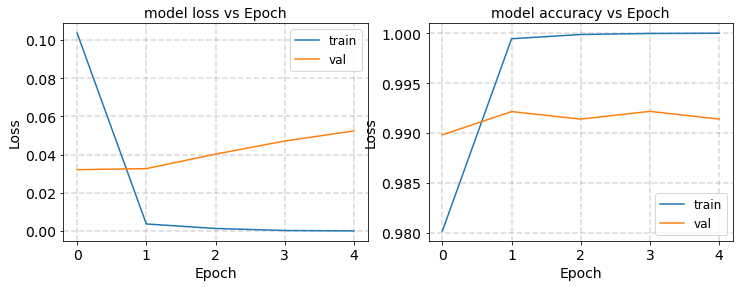

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1821 - accuracy: 0.9687 - val_loss: 0.0525 - val_accuracy: 0.9828
Epoch 2/5
1250/1250 - 3s - loss: 0.0142 - accuracy: 0.9963 - val_loss: 0.0532 - val_accuracy: 0.9844
Epoch 3/5
1250/1250 - 3s - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0569 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0617 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 4s - loss: 5.9854e-04 - accuracy: 0.9999 - val_loss: 0.0727 - val_accuracy: 0.9875


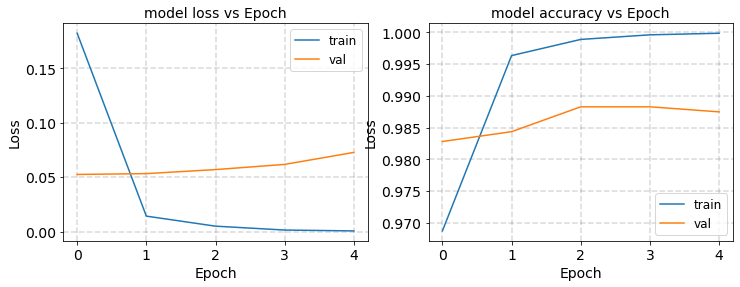

round2 [2 7 4 6]
2
Epoch 1/5
1250/1250 - 4s - loss: 2.1464e-04 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 4s - loss: 8.9525e-05 - accuracy: 1.0000 - val_loss: 0.0924 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 3s - loss: 7.8932e-04 - accuracy: 0.9998 - val_loss: 0.0919 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 4s - loss: 6.4650e-05 - accuracy: 1.0000 - val_loss: 0.0879 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 3s - loss: 6.3959e-06 - accuracy: 1.0000 - val_loss: 0.0899 - val_accuracy: 0.9883


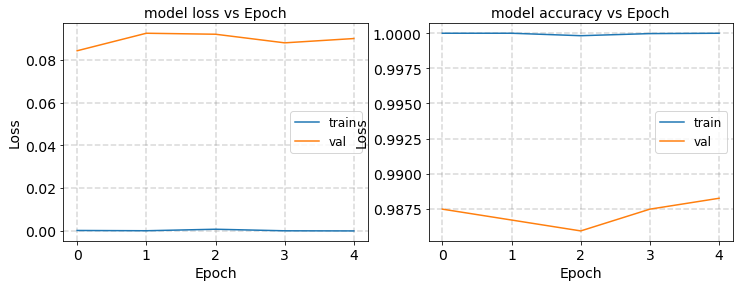

7
Epoch 1/5
1250/1250 - 3s - loss: 0.1695 - accuracy: 0.9773 - val_loss: 0.0518 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0233 - accuracy: 0.9969 - val_loss: 0.0471 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 0.0124 - accuracy: 0.9988 - val_loss: 0.0447 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 0.0086 - accuracy: 0.9991 - val_loss: 0.0481 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 4s - loss: 0.0071 - accuracy: 0.9991 - val_loss: 0.0504 - val_accuracy: 0.9937


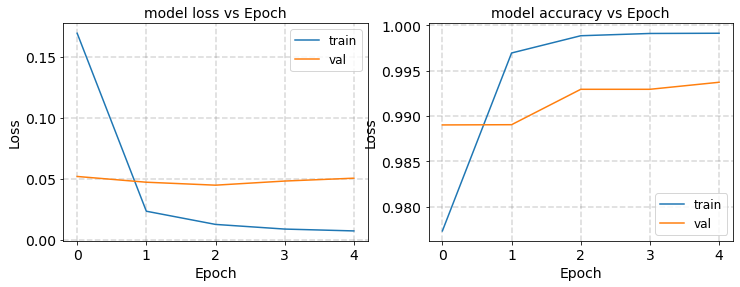

4
Epoch 1/5
1250/1250 - 4s - loss: 0.3005 - accuracy: 0.9271 - val_loss: 0.0500 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 4s - loss: 0.0177 - accuracy: 0.9973 - val_loss: 0.0468 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 4s - loss: 0.0111 - accuracy: 0.9991 - val_loss: 0.0495 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 4s - loss: 0.0083 - accuracy: 0.9992 - val_loss: 0.0541 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 3s - loss: 0.0063 - accuracy: 0.9993 - val_loss: 0.0593 - val_accuracy: 0.9875


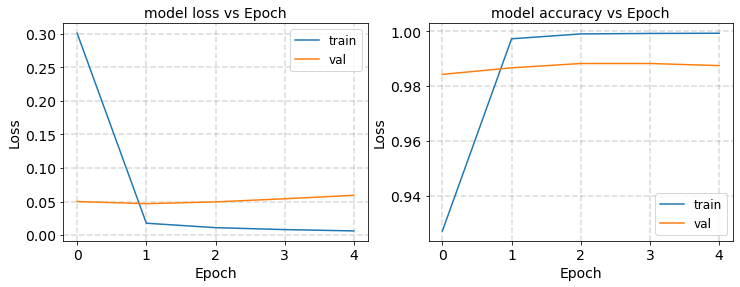

6
Epoch 1/5
1250/1250 - 4s - loss: 0.1285 - accuracy: 0.9698 - val_loss: 0.0350 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.0287 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.0314 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0343 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 7.8332e-04 - accuracy: 0.9998 - val_loss: 0.0375 - val_accuracy: 0.9913


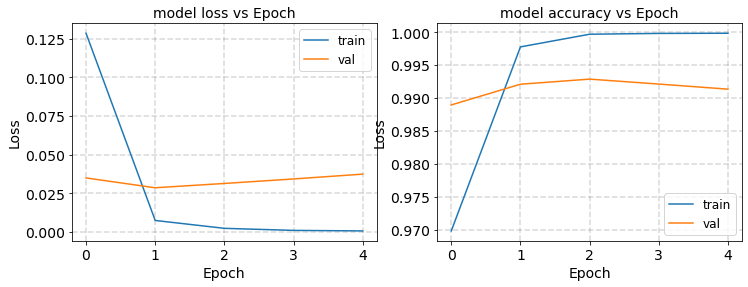

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_6  (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_7  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_8  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_9  (None, 64)                8258      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

In [ ]:
%%time
series = [2,4,6,7]
num_runs = 10
name = '2467_seq_prune_08_4_64_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=64,
                                  num_output_nodes=4,
                                  pruning=0.8,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [ ]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

#### Save dataframe

In [ ]:
import pickle
path = './Exps/'
with open(path + 'df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open(path + 'df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

In [ ]:
df_models[0].layers[1].get_weights()[0]

#### Look at results of first experiment

In [ ]:
for val in exp_dict[name + str(0)]:
    print(val)